## Машинное обучение для текстов

[yandex_practicum]('https://practicum.yandex.ru/learn/data-scientist/courses/aa114b34-448c-498c-a573-c0eee79180a0/sprints/176096/topics/2cf7a200-3b19-4ad8-aff0-d94a9de8a5ef/lessons/4d8665ee-de3a-4d09-bb6d-714e1bab0a6b/)

### Векторизация текстов 

#### Лемматизация

Токенизация (англ. tokenization) — разбиение текста на токены: отдельные фразы, слова, символы.

Лемматизация (англ. lemmatization) — приведение слова к начальной форме — лемме.

In [77]:
from pymystem3 import Mystem
m = Mystem()

In [78]:
m.lemmatize("лемматизируй это")

['лемматизировать', ' ', 'это', '\n']

In [79]:
import pandas as pd
data = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/14_ml_for_text/data/tweets.csv')
data.head()

,text,positive
0,"@first_timee хоть я и школота, но поверь, у на...",1
1,"Да, все-таки он немного похож на него. Но мой ...",1
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1


In [80]:
data.shape

(5000, 2)

In [81]:
# Переведём тексты в стандартный для Python формат: кодировку Unicode U

corpus = data['text'].values.astype('U')


Напишем ряд функций для удобства пользования:
- лемматизируем все
- удалим все, кроме русских букв и пробелов

In [82]:

import re 

corpus = list(data['text'])


def lemmatize(text):
    m = Mystem()
    lemm_list = m.lemmatize(text)
    lemm_text = "".join(lemm_list)
        
    return lemm_text


def clear_text(text):
    res = re.sub(r'[^а-яА-ЯёЁ ]', ' ', text) 
    res_lst = res.split()
    return ' '.join(res_lst)

print("Исходный текст:", corpus[0])
print("Очищенный и лемматизированный текст:", lemmatize(clear_text(corpus[0])))

Исходный текст: @first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа)
Очищенный и лемматизированный текст: хоть я и школоть но поверять у мы то же самый общество профилировать предмет тип



#### Мешок слов и N-граммы


Преобразовать слова в векторы поможет модель «мешок слов» (англ. bag of words).

 Она преобразует текст в вектор, не учитывая порядок слов. Отсюда и название — «мешок».

Суть на примере:

Исходный текст: "Ананасы в шампанском! Ананасы** в шампанском!
Удивительно вкусно, искристо и остро! "

Лемматизированный: "ананас в шампанский
ананас в шампанский
удивительно вкусно искристый и остро"

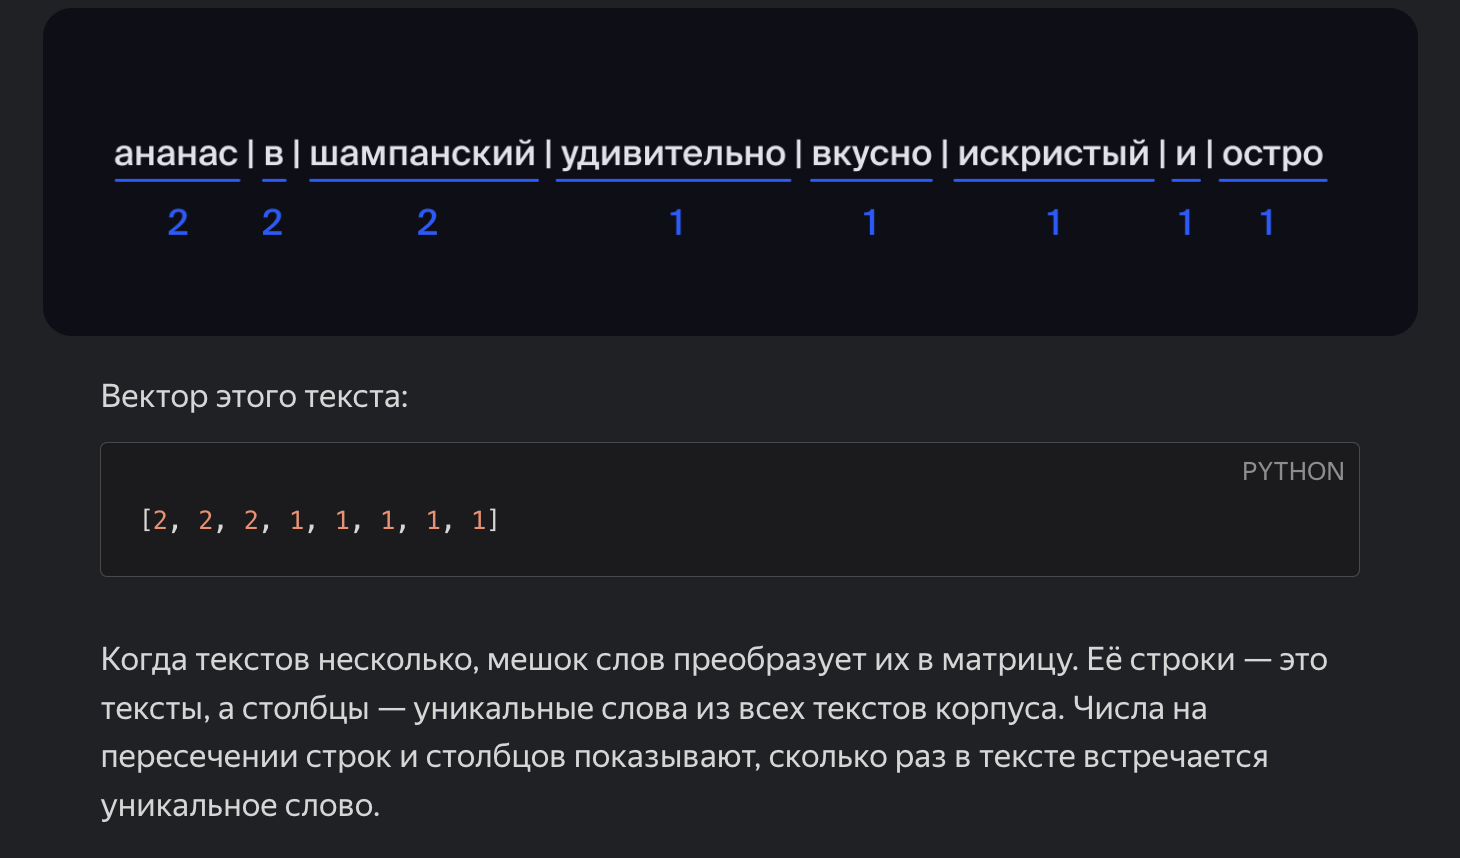

N-грамма — это последовательность из нескольких слов.

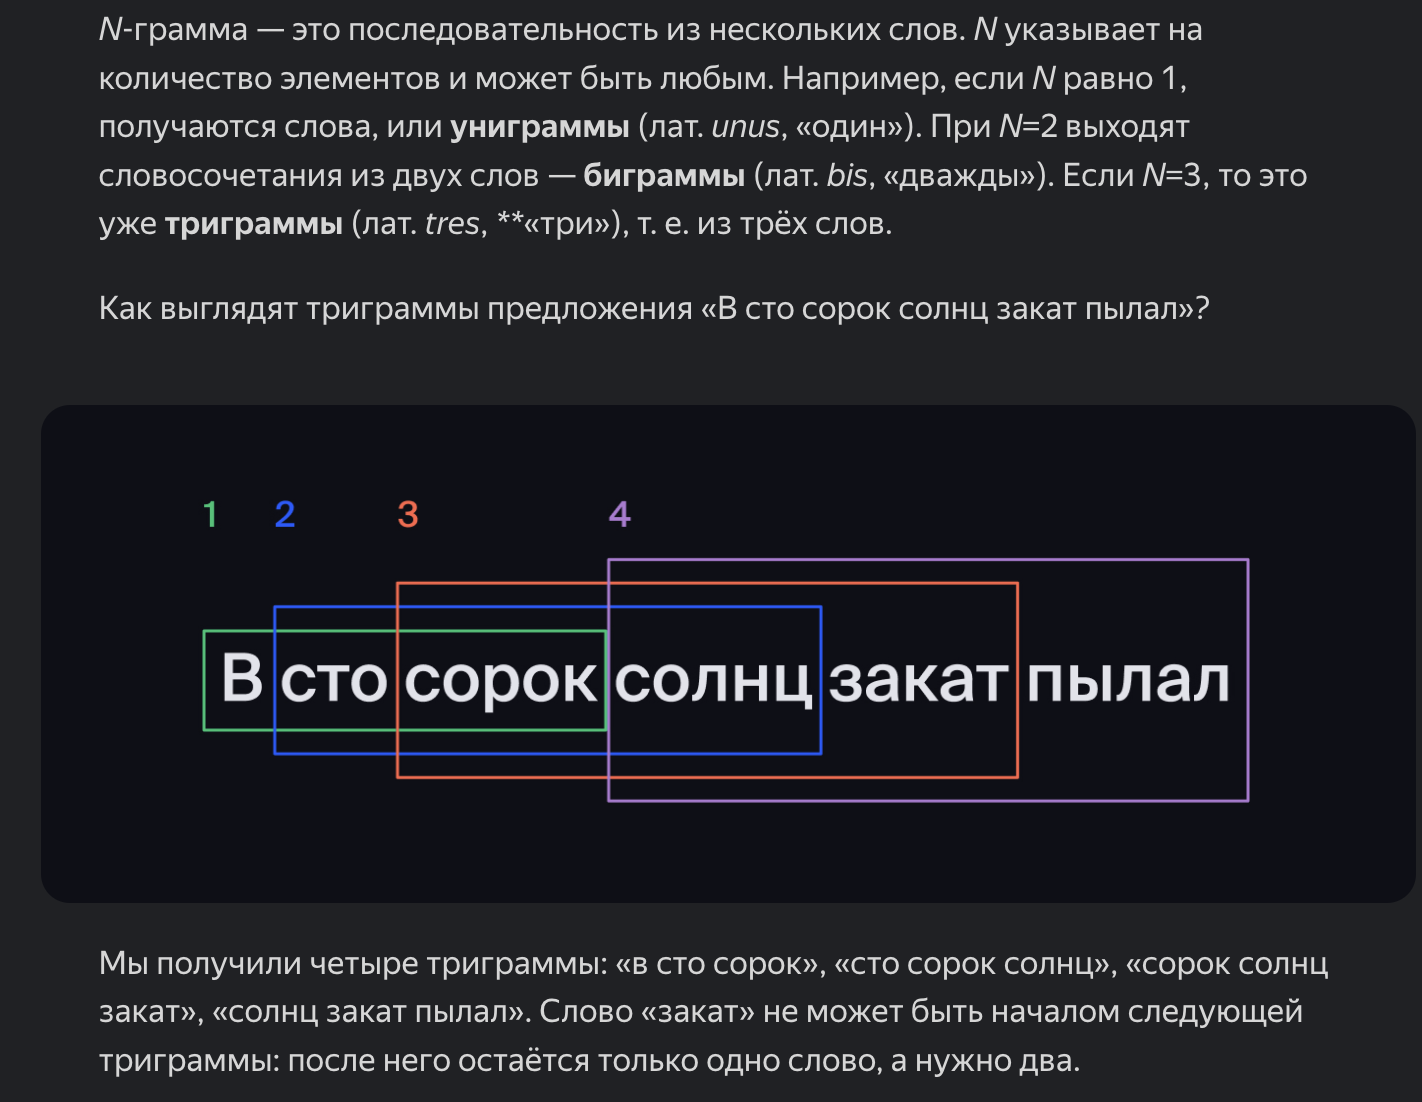

In [83]:
# создание мешка слов 

from sklearn.feature_extraction.text import CountVectorizer 

count_vect = CountVectorizer()


In [84]:
corpus = [
    'ехать Гpека чеpез pека',
    'видеть Гpека в pека pак', 
    'сунуть Гpека pука в pека',
    'pак за pука Гpека цап'
]

Передадим счётчику корпус текстов. Для этого вызовем знакомую вам функцию fit_transform(). 

Счётчик выделит из корпуса уникальные слова и посчитает количество их вхождений в каждом тексте корпуса. Отдельные буквы счётчик как слова не учитывает.

In [85]:
# bow, от англ. bag of words
bow = count_vect.fit_transform(corpus)

bow

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [86]:
bow.shape

(4, 10)

Всё верно, у нас 4 текста и 10 уникальных слов (предлог «в» не учитывается).

In [87]:
print(bow.toarray())

[[0 1 0 0 1 1 0 0 0 1]
 [1 1 0 1 1 0 0 0 0 0]
 [0 1 1 0 1 0 0 1 0 0]
 [1 0 1 0 1 0 1 0 1 0]]


In [88]:
count_vect.get_feature_names_out()

array(['pак', 'pека', 'pука', 'видеть', 'гpека', 'ехать', 'за', 'сунуть',
       'цап', 'чеpез'], dtype=object)

CountVectorizer() также нужен для расчёта N-грамм. Чтобы он считал словосочетания, укажем размер N-граммы через аргумент ngram_range (англ. «диапазон N-грамм»). 

Например, если мы ищем словосочетания по два слова в фразе, то диапазон зададим такой:

In [89]:
count_vect = CountVectorizer(ngram_range=(2, 2)) 

count_vect.fit_transform(corpus)

count_vect.get_feature_names_out()

array(['pак за', 'pека pак', 'pука pека', 'pука гpека', 'видеть гpека',
       'гpека pека', 'гpека pука', 'гpека цап', 'гpека чеpез',
       'ехать гpека', 'за pука', 'сунуть гpека', 'чеpез pека'],
      dtype=object)

Чтобы почистить мешок слов, найдём стоп-слова, то есть слова без смысловой нагрузки. Их много, и для каждого языка — свои. Разберём пакет stopwords, который находится в модуле nltk.corpus библиотеки nltk (англ. Natural Language Toolkit, «инструментарий естественного языка»):

In [90]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tony_builder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Вызовем функцию stopwords.words(), передадим ей аргумент 'russian', то есть русскоязычные стоп-слова:

In [91]:
stop_words = set(stopwords.words('russian'))

In [92]:
# Теперь счётчик знает, какие слова нужно исключить из мешка слов.

count_vect = CountVectorizer(stop_words=stop_words)

Пример работы на лематзированном датасете:

In [93]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 


In [94]:

data = pd.read_csv("/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/14_ml_for_text/data/tweets_lemm.csv")
corpus = data['lemm_text'].values.astype('U')


In [95]:

# до удаления стоп-слов
count_vect = CountVectorizer()
bow = count_vect.fit_transform(corpus)

print("Размер мешка без учёта стоп-слов:", bow.shape)



Размер мешка без учёта стоп-слов: (5000, 9345)


In [96]:
# создайте новый мешок слов с учётом стоп-слов

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = list(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tony_builder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
count_vect = CountVectorizer(stop_words=stop_words)


In [98]:
bow = count_vect.fit_transform(corpus)

In [99]:
print("Размер мешка с учётом стоп-слов:", bow.shape)

Размер мешка с учётом стоп-слов: (5000, 9248)


Итак, мы создали счетчик до удаления стоп-слов и после удаления стоп-слов. 

превратили лемматизированный текст в векторный вид и по сути дропнули из мешка слов все стоп-слова.

Судя по результату, матершинины было 9345-9248 = 97 слов)

#### TF-IDF (оценка важности слова)

Мешок слов учитывает частоту употребления слов. Посмотрим, как часто уникальное слово встречается во всём корпусе и в отдельном его тексте.


Оценка важности слова определяется величиной TF-IDF (от англ. term frequency, «частота терма, или слова»; inverse document frequency, «обратная частота документа, или текста»). То есть TF отвечает за количество упоминаний слова в отдельном тексте, а IDF отражает частоту его употребления во всём корпусе.

Формула:

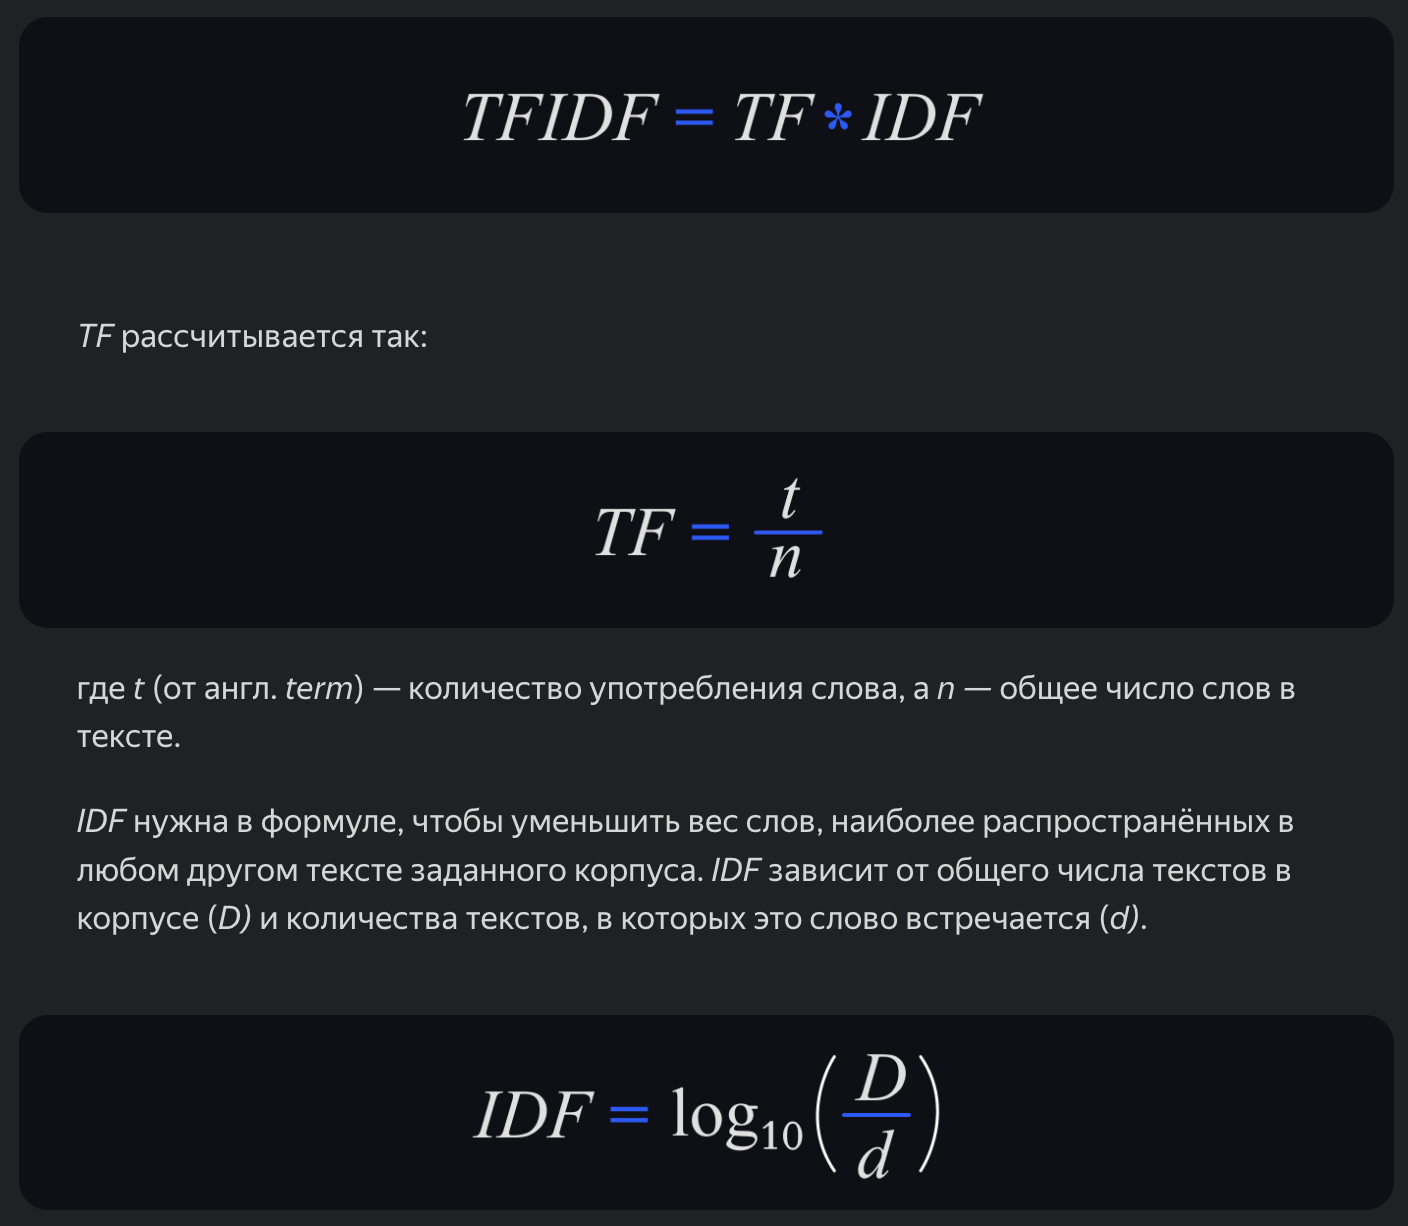

        Большая величина TF-IDF говорит об уникальности слова в тексте по отношению к корпусу. Чем чаще оно встречается в конкретном тексте и реже в остальных, тем выше значение TF-IDF.

Пример: рассчитать TFIDF слова "коралл" для третьего текста в корпусе

In [100]:
[
    'Карл у Клара украсть коралл',
    'Клара у Карл украсть кларнет',
    'Клара строго карать Карл за кража коралл'
]

['Карл у Клара украсть коралл',
 'Клара у Карл украсть кларнет',
 'Клара строго карать Карл за кража коралл']

In [101]:
import numpy as np
np.log10(3/2) * 1/7

0.025155894150811604

Примечание: Если данные разделены на обучающую и тестовую выборки, функцию fit() запускайте только на обучающей. Иначе тестирование будет нечестным: в модели будут учтены частоты слов из тестовой выборки.



Расчет для каждого слова в корпусе будет выглядеть так: (результат - матрица)

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = list(stopwords.words('russian'))

count_tf_idf = TfidfVectorizer(stop_words=stop_words)
tf_idf = count_tf_idf.fit_transform(corpus)
tf_idf.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tony_builder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(5000, 9248)

#### Классификация тональности текста

Для определения тональности применим величины TF-IDF как признаки.

Анализ тональности текста, или сентимент-анализ (от англ. sentiment, «настроение»), выявляет эмоционально окрашенные слова. Этот инструмент помогает компаниям оценивать, например, реакцию на запуск нового продукта в интернете. На разбор тысячи отзывов человек потратит несколько часов, а компьютер — пару минут.

Оценить тональность — значит отметить текст как позитивный или негативный. То есть мы решаем задачу классификации, где целевой признак равен «1» для положительного текста и «0» для отрицательного. Признаки — это слова из корпуса и их величины TF-IDF для каждого текста.

        Отдельно мини-проект - см файл 'mini_proj'

### Языковые представления